In [2]:
from keras.datasets import cifar100
 
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [0]:
from keras.models import Sequential
from keras.utils import to_categorical

In [11]:
X_train = x_train.reshape(50000, 32 * 32 * 3)
X_test = x_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

IndexError: ignored

In [4]:
model= Sequential()

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [0]:
model.add(Dense(units=64, activation='relu', input_dim=(32,32,3)))
model.add(Dense(units=1, activation='softmax'))

In [0]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [0]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [0]:
initializer = keras.initializers.glorot_normal(seed=None)

In [20]:
model.add(Dense(1024,kernel_initializer=initializer, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
history=model.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 230us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 2/50
60000/60000 [==============================] - 14s 229us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 3/50
60000/60000 [==============================] - 14s 227us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 4/50
60000/60000 [==============================] - 14s 233us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 5/50
60000/60000 [==============================] - 14s 228us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 6/50
60000/60000 [==============================] - 14s 228us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 7/50
60000/60000 [==============================] - 14s 229us/step - loss: 14.5283 - acc: 0.0986 -

In [34]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

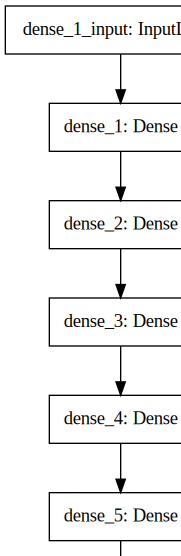

In [35]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

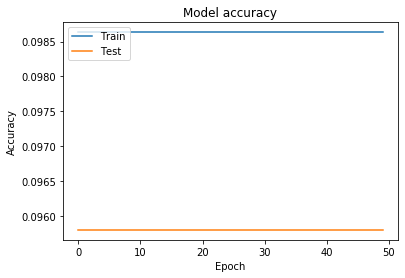

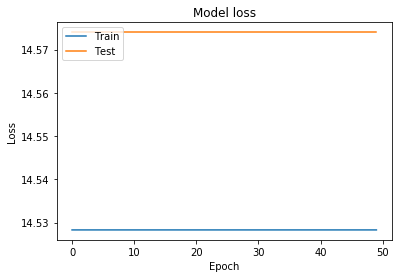

In [37]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()